### SET data ###

In [472]:
### python 3.8.5 ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy import signal
from itertools import chain
from statistics import stdev
from statistics import mean

cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i)
        

### Orginal (8x8) ###

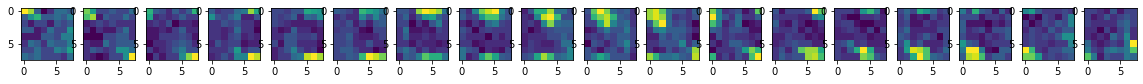

In [473]:
fig, axes = plt.subplots(1,18, figsize=(20,20))

for idx,charts in enumerate(axes):
    charts.imshow(set_np_array[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

# plt.show()

### Orginal (8x8) filter [[0,-1,0],[-1,15,-1],[0,-1,0]] ###

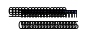

In [474]:
fig, axes = plt.subplots(1,18, figsize=(1,1))
filter_img_data = []

filter_kernel = np.array([[0,-1,0],
                          [-1,15,-1],
                          [0,-1,0]])

for idx,charts in enumerate(axes):
    set_data=charts.imshow(set_np_array[idx], interpolation='bilinear')
    grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
    filter_img_data.append(grad)

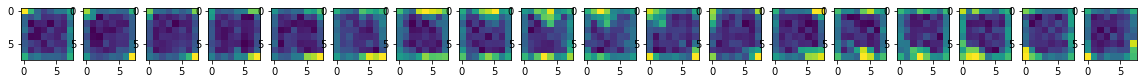

In [475]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
    charts.imshow(filter_img_data[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

### Orginal (8x8) filter [[0,1,0],[1,5,1],[0,1,0]] ###

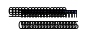

In [476]:
fig, axes = plt.subplots(1,18, figsize=(1,1))
filter_img_data = []

filter_kernel = np.array([[0,1,0],
                          [1,5,1],
                          [0,1,0]])

for idx,charts in enumerate(axes):
    set_data=charts.imshow(set_np_array[idx], interpolation='bilinear')
    grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
    filter_img_data.append(grad)

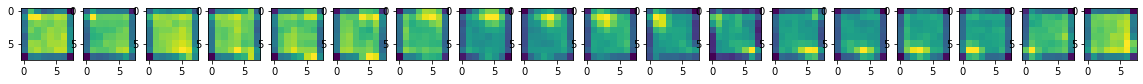

In [477]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
    charts.imshow(filter_img_data[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

### linear (72x72) ### 

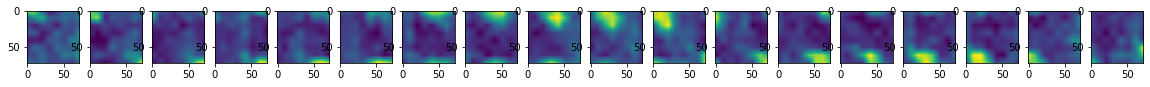

In [478]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)
    

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
    # print("\n",set_data.get_array())


### Linear (72x72) with filter [[0,-1,0],[-1,15,-1],[0,-1,0]] ###

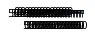

In [479]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []

filter_kernel = np.array([[0,-1,0],
                          [-1,15,-1],
                          [0,-1,0]])


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

filter_img_data = []

fig, axes = plt.subplots(1,18, figsize=(1,1))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
        # print("\n",set_data.get_array())
        grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
        # print("\n",grad)
        filter_img_data.append(grad)
        # charts.imshow(grad[idx])


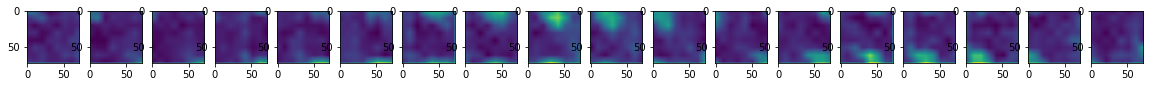

In [480]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(filter_img_data[idx])


### Linear (72x72) with filter [[0,1,0],[1,5,1],[0,1,0]] ###

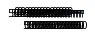

In [481]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []

filter_kernel = np.array([[0,1,0],
                          [1,5,1],
                          [0,1,0]])


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

filter_img_data = []

fig, axes = plt.subplots(1,18, figsize=(1,1))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
        # print("\n",set_data.get_array())
        grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
        # print("\n",grad)
        filter_img_data.append(grad)
        # charts.imshow(grad[idx])


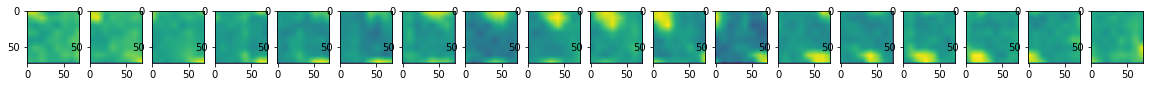

In [482]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(filter_img_data[idx])


### Binary thresholding (8x8) theshold std 25 ###

In [483]:
set_image_bin = []

for frame in set_np_array:
    flatten_list = list(chain.from_iterable(frame))
    # set_std_each_frame.append(stdev(flatten_list))
    set_std = stdev(flatten_list)
    set_frame = []

    for temp in flatten_list:
        cal_std_temp = temp - (4 * set_std)
        if cal_std_temp >= 25:
            set_frame.append(255)
        else:
            set_frame.append(0)
    set_np_array = np.array(set_frame)
    set_image_bin.append(set_np_array.reshape(8,8))


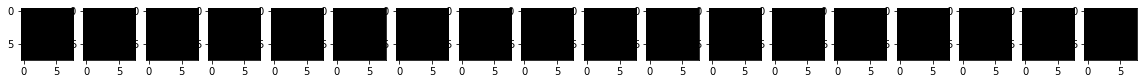

In [484]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")

### Binary thresholding (8x8) theshold dynamic by mean ###

In [485]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i)
        

set_image_bin = []

for frame in set_np_array:
    flatten_list = list(chain.from_iterable(frame))
    # print("\n",flatten_list)
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    set_frame = []

    for temp in flatten_list:
        # cal_std_temp = temp - (4 * frame_std)
        if temp >= frame_mean:
            set_frame.append(255)
        else:
            set_frame.append(0)

    set_np_array_frame = np.array(set_frame)
    set_image_bin.append(set_np_array_frame.reshape(8,8))


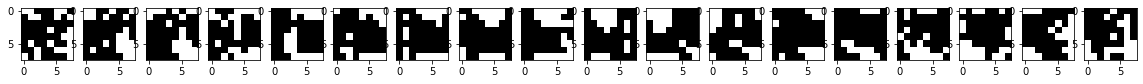

In [486]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")

### Binary thresholding (72x72) theshold std 25 ###

In [487]:
# set_np_array[0]

set_resize_array = []
set_image_bin = []

zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

for frame in set_resize_array:
    flatten_list = list(chain.from_iterable(frame))
    # set_std_each_frame.append(stdev(flatten_list))
    set_std = stdev(flatten_list)
    set_frame = []

    for temp in flatten_list:
        cal_std_temp = temp - (4 * set_std)
        if cal_std_temp >= 25:
            set_frame.append(255)
        else:
            set_frame.append(0)
    set_np_array = np.array(set_frame)
    set_image_bin.append(set_np_array.reshape(72,72))


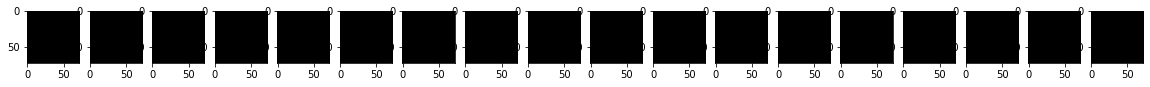

In [488]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")

### Binary thresholding (72x72) theshold dynamic by mean ###

In [489]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i)

set_resize_array = []
set_image_bin = []

zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

for frame in set_resize_array:
    flatten_list = list(chain.from_iterable(frame))
    # print("\n",flatten_list)
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    set_frame = []

    for temp in flatten_list:
        # cal_std_temp = temp - (4 * frame_std)
        if temp >= frame_mean:
            set_frame.append(255)
        else:
            set_frame.append(0)

    set_np_array_frame = np.array(set_frame)
    set_image_bin.append(set_np_array_frame.reshape(72,72))


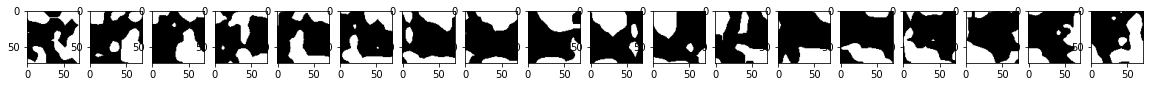

In [490]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")